# Boston Crime Data Project
#### By: MaryGrace Kane

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import numpy as np

In [9]:
crimes = pd.read_csv('boston_crimes.csv', parse_dates = ['OCCURRED_ON_DATE'])
crimes

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347.0,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151.0,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272.0,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421.0,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285.0,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520.0,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520.0,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569.0,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [10]:
profile = crimes.profile_report(title='Boston Crimes Profiling')
profile.to_file(output_file='boston-crimes-profiling.html')

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

C:\Users\Craig\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


KeyboardInterrupt: 

#### The profile report reported high cardinality, high correlations, duplicates, and missing values for different columns in the dataset. None of these caused reason for additonal work, except that there is a large amount of missing values in the 'SHOOTING' column. To be specific, SHOOTING has 318054 (99.7%) missing values. This will require some preliminary work to clean this column of data. 

# Preliminary Work

#### Filling values in the shooting column with boolean values, including missing values as False. 

In [11]:
crimes['SHOOTING'] = crimes.SHOOTING.replace({'Y': True, np.nan: False})
crimes['SHOOTING'].value_counts()

False    318054
True       1019
Name: SHOOTING, dtype: int64

In [12]:
crimes.dtypes

INCIDENT_NUMBER                object
OFFENSE_CODE                    int64
OFFENSE_CODE_GROUP             object
OFFENSE_DESCRIPTION            object
DISTRICT                       object
REPORTING_AREA                float64
SHOOTING                         bool
OCCURRED_ON_DATE       datetime64[ns]
YEAR                            int64
MONTH                           int64
DAY_OF_WEEK                    object
HOUR                            int64
UCR_PART                       object
STREET                         object
Lat                           float64
Long                          float64
Location                       object
dtype: object

#### Now, all the missing NaN values have been replaced with "False" to indicate that shooting was not involved in the incident. All of the incidents where shooting was involved (rows in which the SHOOTING column was marked with a 'Y' for yes) have been replaced with "True." I used the replace() method so that this action would rewrite the original dataframe, rather than making a displayed copy, so that I can use this information moving forward. 

#### Updated Dataframe:

In [13]:
crimes

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,False,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347.0,False,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151.0,False,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272.0,False,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421.0,False,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285.0,False,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520.0,False,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520.0,False,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569.0,False,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


# What is the range of dates being reported?


#### First, I separated the datetime value that is in the 'OCCURRED_ON_DATE' column into a date value and a time value. I created new columns in the dataframe entitled 'date' and 'time' to reflect this information. To find the range of dates being reported, I took the minimum and maximum values of my date column. This returns the oldest date (minimum) and most recent date (maximum). To find the range in which these dates covered, I subtracted the minimum date from the maximum.  Finally, I reported my findings by using a print statement. When using the range_count (the difference between the minimum and maximum dates), I had to select the 'days' from the range_count because it includes a timestamp since the date values are still technically part of a larger datetime. Therefore, I needed to select the 'days' so that the timestamp would not be included in the print statement. 

In [14]:
crimes['date']= pd.to_datetime(crimes['OCCURRED_ON_DATE']).dt.date
crimes['time']= pd.to_datetime(crimes['OCCURRED_ON_DATE']).dt.time

range_date_min = crimes.date.min()
range_date_max = crimes.date.max()
range_count = range_date_max - range_date_min

print(f' The range begins on {range_date_min} and ends on {range_date_max}, meaning it covers a total time of {range_count.days} days.')


 The range begins on 2015-06-15 and ends on 2018-09-03, meaning it covers a total time of 1176 days.


#### Selecting just date or time from a datetime value; pd.to_datetime(df['column']).dt.__ code citation: https://www.geeksforgeeks.org/how-to-convert-datetime-to-date-in-pandas/

# What are all the unique groups of offense codes and which are most prevalent in the data?

#### To find the amount of crimes committed per group of offense code, I used the value_counts() method on the OFFENSE_CODE_GROUP column of the crimes dataframe. By using the value_counts() method, it returns the name of the offense code group along with the number of crimes listed under that offense code group in descending order. Through this method, I was able to determine that 'Motor Vehicle Accident Response' is the most prevalent group of offense codes in the data set. 

In [15]:
num_per_offense_code = crimes.OFFENSE_CODE_GROUP.value_counts()

num_per_offense_code

Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18750
Other                                        18075
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

# What percentage of murders involved a shooting?
#### Look at Murder, non-negligent manslaughter (offense_code 111). Also note that seaborn has no pie chart! If that's what you want, you need to use matplotlib.


#### To represent the percentage of murders involving a shooting, I used a pie chart. To create this pie chart, I used matplotlib.pyplot.pie(), or plt.pie(). I inputted the data of the true/false boolean values of whether or not shooting was involved for all the murders in the data set. I did this using the loc operator, which allowed me to select all the rows were the Offence_Code was a 111 and return the Shooting Column value. By doing a value_counts() on these rows, it returns the number of rows in which shooting is marked as True as opposed to False. I inputted this data into the pie chart with the labels True and False to represent this information in a pie chart. From stackoverflow, I also found how to display the percentages within the pie chart. According to the graph, 75% of murders include a shooting.

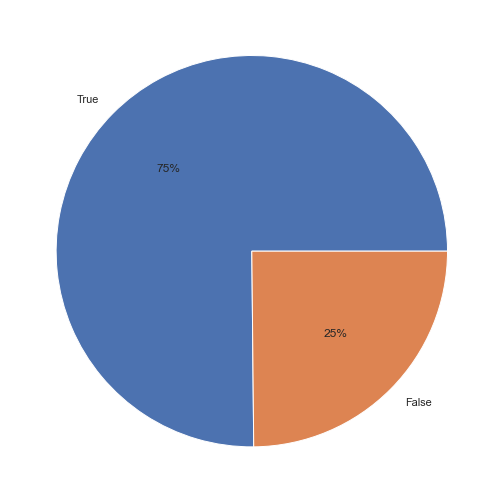

In [22]:
# crimes.loc[crimes['OFFENSE_CODE'] == 111, 'SHOOTING'].value_counts()
plt.pie(crimes.loc[crimes['OFFENSE_CODE'] == 111, 'SHOOTING'].value_counts(), labels = [True, False], autopct='%1.0f%%')
plt.show()

#### Citation for how to input percentages into the pie chart: https://stackoverflow.com/questions/21572870/matplotlib-percent-label-position-in-pie-chart

# Are there certain times of the year when crime is more prevalent in Boston?
#### If you want to count crimes on each day, you will need to create a new 'date' column by extracting the date from the datetime.

#### Using information found on SparkBy{Examples}, I selected all the months from the datetime value in the OCCURRED_ON_DATE column of the data set and performed a value_counts(). This returned a series that counted the number of crimes that occurred within each month. I was then able to use seaborn bar plot to plot this information using the index of the series (the month) as the independent vairable and the value associated as the dependent variable. I used matplotlib.pyplot to add labels/titles to the graph.  According to the graph, the summer months (6-8; June-August) are when the most crimes are committed. 

In [34]:
# crime_months = pd.DatetimeIndex(crimes.OCCURRED_ON_DATE).month.value_counts()
crime_months = pd.DatetimeIndex(crimes.OCCURRED_ON_DATE).month.value_counts()
crime_months
# sns.barplot(x=crime_months.index, y=crime_months)
# plt.title('Crimes Per Month')
# plt.xlabel('Month')
# plt.ylabel('Number of Crimes')
# plt.show()

8     34823
7     34556
6     30568
9     26543
5     26199
10    25737
3     24146
4     24086
11    23675
1     23610
12    23477
2     21653
Name: OCCURRED_ON_DATE, dtype: int64

#### Using the same process and logistics as before, I now selected the day of the month rather than the month. This showed me on which days of the month crimes are most likely to occur. According to the graph, the first of the month is the most likely day within a month for a crime to be committed. I also needed to reference stackoverflow on how to make the plot size bigger for a seaborn barplot, because the previous method used with matplotlib.pyplot did not work in this context. 

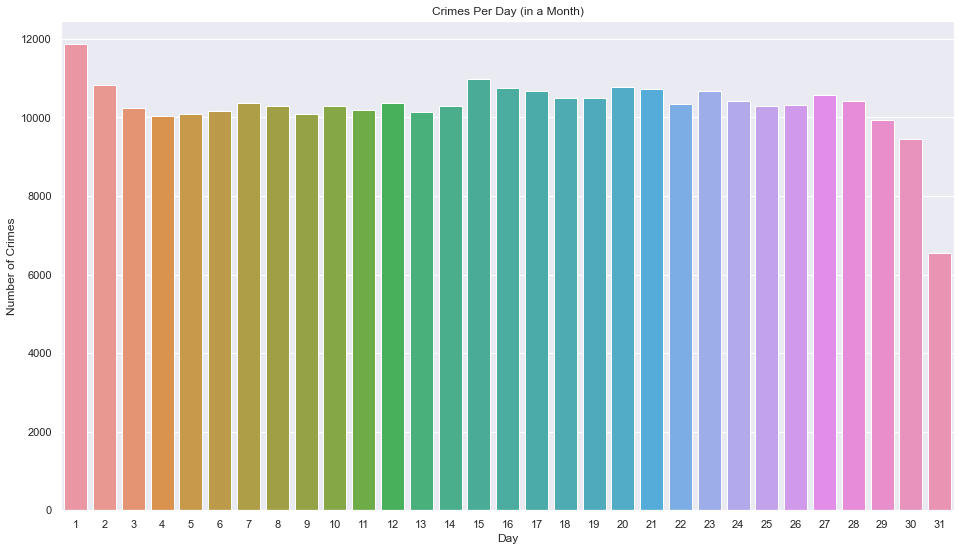

In [20]:
crime_days = pd.DatetimeIndex(crimes.OCCURRED_ON_DATE).day.value_counts()
sns.barplot(data=crimes, x=crime_days.index, y=crime_days)
plt.title('Crimes Per Day (in a Month)')
plt.xlabel('Day')
plt.ylabel('Number of Crimes')
sns.set(rc={'figure.figsize':(16,9)})
plt.show()

#### I again applied the same process and logistics as before, but instead used the DAY_OF_WEEK column to determine on which day of the week the most crimes are committed. According to the graph, the most crimes are committed on Fridays. Unfortunately, I could not determine how to sort the data in chronological order according to the day of the week (Sunday-Saturday), but the data is sorted in the default descending order. 

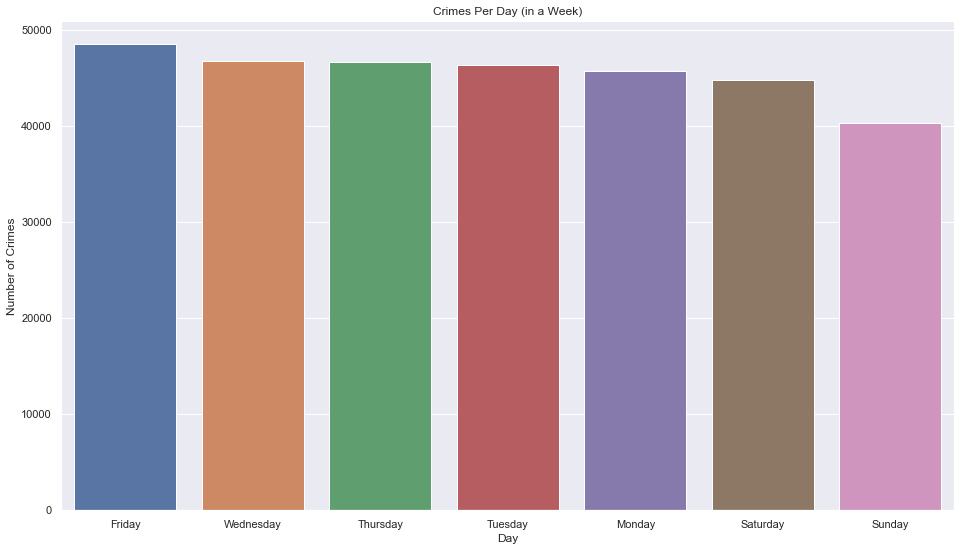

In [19]:
crime_days = crimes.DAY_OF_WEEK.value_counts()
sns.barplot(data=crimes, x=crime_days.index, y=crime_days)
plt.title('Crimes Per Day (in a Week)')
plt.xlabel('Day')
plt.ylabel('Number of Crimes')
sns.set(rc={'figure.figsize':(16,9)})
plt.show()

#### Select Month from Datetime value; pd.DatetimeIndex().month code citation: https://sparkbyexamples.com/pandas/pandas-extract-month-and-year-separately-from-datetime-column/#:~:text=Use%20pandas%20DatetimeIndex()%20to,a%20date%20as%20an%20argument.

#### Change Plot size for seaborn barplot; sns.set(rc={'figure.figsize':(16,9)}) code citation: https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot

# In which districts is crime most prevalent?

#### I performed a value_counts() on the DISTRICT column of the data set to return a series that counted the number of crimes that occurred within each district. I was then able to use seaborn bar plot to plot this information using the index of the series (the district) as the independent vairable and the value associated as the dependent variable. I used matplotlib.pyplot to add labels/titles to the graph.  According to the graph, the B2 District of Roxbury is the district where the most crimes are committed. 

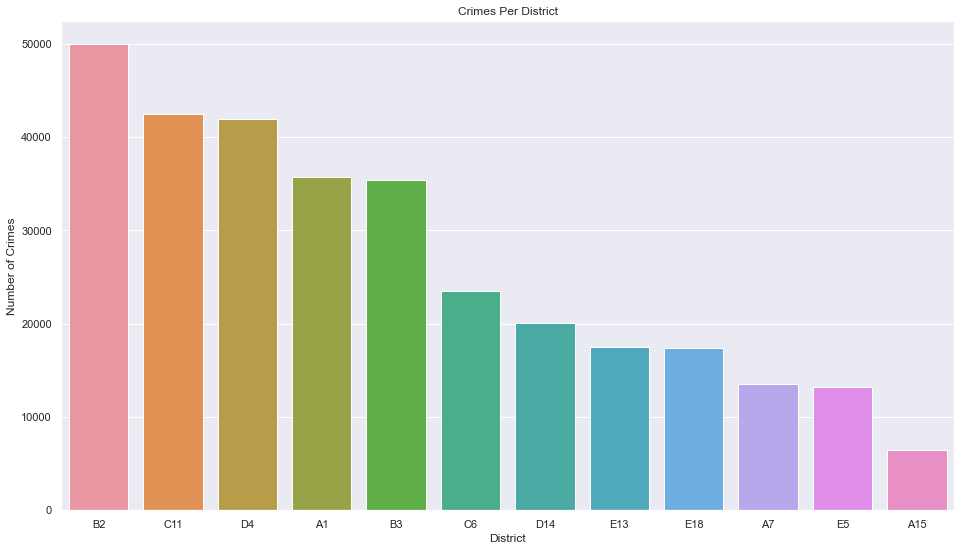

In [37]:
crime_districts = crimes.DISTRICT.value_counts()
sns.barplot(data=crimes, x=crime_districts.index, y=crime_districts)
plt.title('Crimes Per District')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.show()

# Are crimes more prevalent at night or during the day?

#### First, I defined what I would qualify as 'night' versus 'day.' I decided that I would count the hours between 6p.m. and 6a.m. as night, and the hours between 6a.m. and 6p.m. as day. Using this definition, I created a column in the dataframe called 'night_crimes' that assigned a boolean value based on if the crime occurred between 6 p.m. (18) and 6 a.m. (6). I used the expression (crimes.HOUR > 18) | (crimes.HOUR < 6) to say that if the hour was greater than 18 or less than 6, then it is considered a night_crime. Using this new column in the dataframe, I used a value_counts to determine how many crimes were committed at night (True) versus during the day (False). I inputted this information into a pie chart with the corresponding labels of occurring at night or day, and displayed the percentages. According the the pie chart, the 64% of crimes are committed during the day, or between 6 a.m. and 6 p.m.

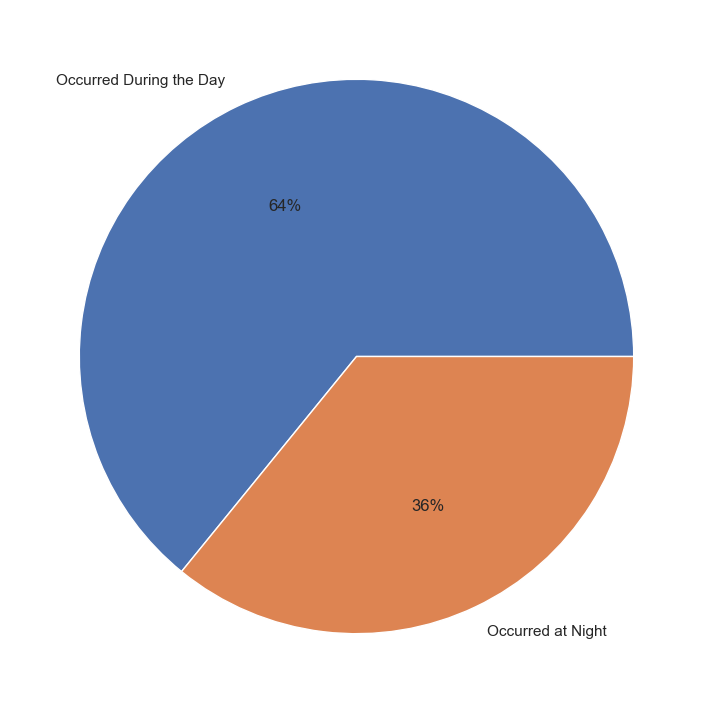

In [250]:
# night is from 6pm-6am, day is from 6am-6pm
# day_crimes = crimes.loc[(crimes.HOUR >= 6) & (crimes.HOUR <= 18)]
# night_crimes = crimes.loc[(crimes.HOUR > 18) | (crimes.HOUR < 6)]

crimes['night_crimes'] = (crimes.HOUR > 18) | (crimes.HOUR < 6)
plt.pie(crimes['night_crimes'].value_counts(), labels = ['Occurred During the Day', 'Occurred at Night'], autopct='%1.0f%%')
plt.show()

# At what time is crime most prevalent?

#### I performed a value_counts() on the HOUR column of the data set to return a series that counted the number of crimes that occurred within each hour in a day. I was then able to use seaborn bar plot to plot this information using the index of the series (the hour) as the independent vairable and the value associated as the dependent variable. I used matplotlib.pyplot to add labels/titles to the graph.  According to the graph, the most crimes are committed between 5 and 6 p.m. 

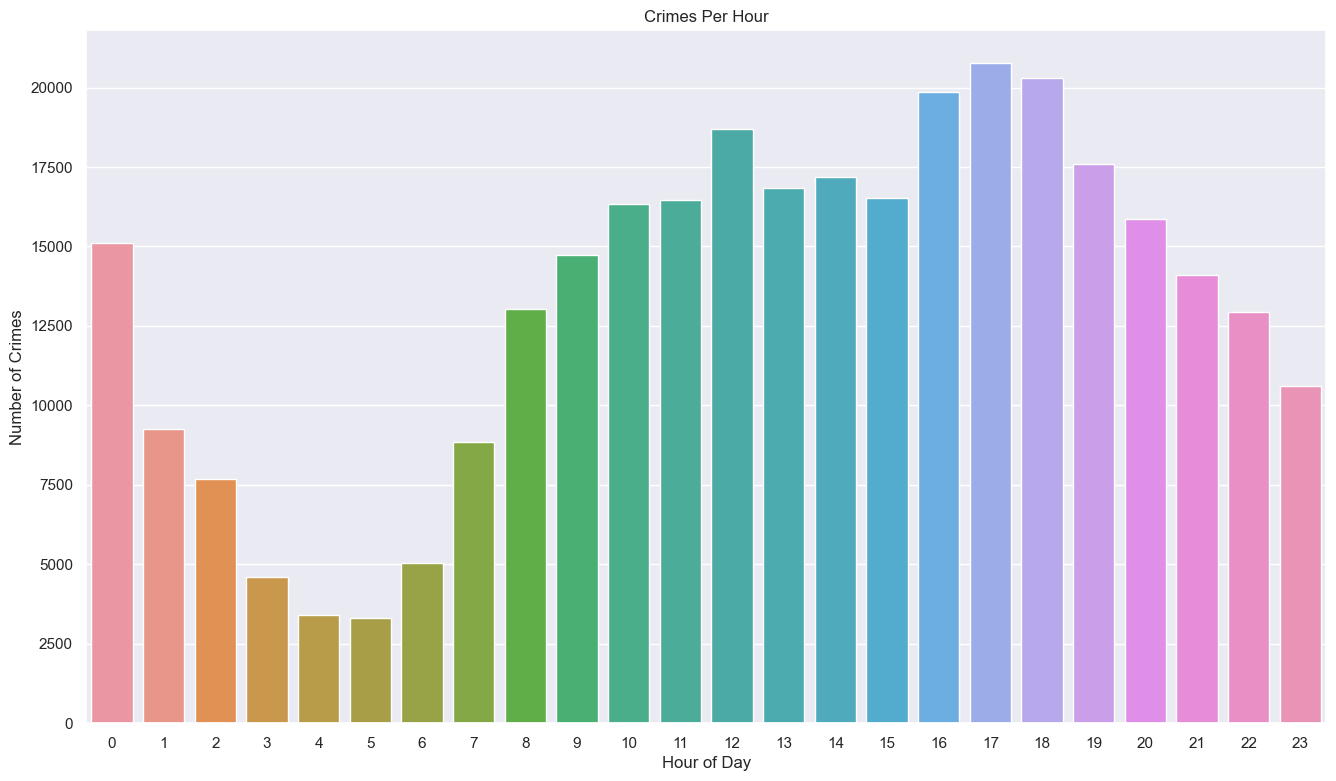

In [249]:
crime_times = crimes.HOUR.value_counts()
sns.barplot(data=crimes, x=crime_times.index, y=crime_times)
plt.title('Crimes Per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.show()